In [1]:
greetings = "Assalam-o-Alaikum"
print(greetings)

Assalam-o-Alaikum


### Import Libraries

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

### Import Dataset

In [3]:
df = pd.read_csv("Stackoverflow.csv")
df[:2]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"


### Create Dummy Variables of Country

In [4]:
df_c = pd.get_dummies(df["Country"])
df = pd.concat([df, df_c], axis = 1)
df = df[df.columns.drop("Country")]
df[:2]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,France,India,Ireland,Russia,South Africa,Spain,Sweeden,UK,USA,Ukraine
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git,21,13,Male,NaN,0,0,0,0,1,0,0,0,0,0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,7.0,Git;Subversion,38,9,Male,"70,841.00",0,0,0,0,0,0,1,0,0,0


### Binarizing columns

In [5]:
df["Paid_Job"] = 0

df.loc[df["ConvertedSalary"] > 0, "Paid_Job"] = 1

df[:2]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,...,India,Ireland,Russia,South Africa,Spain,Sweeden,UK,USA,Ukraine,Paid_Job
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git,21,13,Male,NaN,...,0,0,0,1,0,0,0,0,0,0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,7.0,Git;Subversion,38,9,Male,"70,841.00",...,0,0,0,0,0,1,0,0,0,1


### Binning values

In [6]:
df["Equal_Binned"] = pd.cut(df["ConvertedSalary"], 5)
df[:2]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,...,Ireland,Russia,South Africa,Spain,Sweeden,UK,USA,Ukraine,Paid_Job,Equal_Binned
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git,21,13,Male,NaN,...,0,0,1,0,0,0,0,0,0,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,7.0,Git;Subversion,38,9,Male,"70,841.00",...,0,0,0,0,1,0,0,0,1,"(-2000.0, 400000.0]"


In [7]:
# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

df["Boundary_Binned"] = pd.cut(df["ConvertedSalary"], bins, labels = labels)

df[:2]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,...,Russia,South Africa,Spain,Sweeden,UK,USA,Ukraine,Paid_Job,Equal_Binned,Boundary_Binned
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git,21,13,Male,NaN,...,0,1,0,0,0,0,0,0,NaN,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,7.0,Git;Subversion,38,9,Male,"70,841.00",...,0,0,0,1,0,0,0,1,"(-2000.0, 400000.0]",Medium


In [8]:
df.isnull().sum()

SurveyDate                      0
FormalEducation                 0
ConvertedSalary               334
Hobby                           0
StackOverflowJobsRecommend    512
VersionControl                  0
Age                             0
Years Experience                0
Gender                        306
RawSalary                     334
France                          0
India                           0
Ireland                         0
Russia                          0
South Africa                    0
Spain                           0
Sweeden                         0
UK                              0
USA                             0
Ukraine                         0
Paid_Job                        0
Equal_Binned                  334
Boundary_Binned               334
dtype: int64

### Replacing missing values with constants

In [9]:
df["Gender"].fillna("Not Given", inplace = True)

### Filling Missing Values

In [10]:
df["ConvertedSalary"] = df["ConvertedSalary"].fillna(df["ConvertedSalary"].mean())
df[:2]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,...,Russia,South Africa,Spain,Sweeden,UK,USA,Ukraine,Paid_Job,Equal_Binned,Boundary_Binned
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),92565.169925,Yes,NaN,Git,21,13,Male,NaN,...,0,1,0,0,0,0,0,0,NaN,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.000000,Yes,7.0,Git;Subversion,38,9,Male,"70,841.00",...,0,0,0,1,0,0,0,1,"(-2000.0, 400000.0]",Medium


In [11]:
df["ConvertedSalary"] = df["ConvertedSalary"].astype("int")

In [12]:
# Fill missing values with the mean
df['StackOverflowJobsRecommend'].fillna(df['StackOverflowJobsRecommend'].mean(), inplace=True)

### Dealing with bad characters

In [13]:
df["RawSalary"] = df["RawSalary"].str.replace(",", "")
df["RawSalary"] = df["RawSalary"].str.replace("£", "")
df["RawSalary"] = df["RawSalary"].str.replace("$", "")
df["RawSalary"] = df["RawSalary"].astype("float")

In [14]:
df["RawSalary"].fillna(df["RawSalary"].mean(), inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   SurveyDate                  999 non-null    object  
 1   FormalEducation             999 non-null    object  
 2   ConvertedSalary             999 non-null    int32   
 3   Hobby                       999 non-null    object  
 4   StackOverflowJobsRecommend  999 non-null    float64 
 5   VersionControl              999 non-null    object  
 6   Age                         999 non-null    int64   
 7   Years Experience            999 non-null    int64   
 8   Gender                      999 non-null    object  
 9   RawSalary                   999 non-null    float64 
 10  France                      999 non-null    uint8   
 11  India                       999 non-null    uint8   
 12  Ireland                     999 non-null    uint8   
 13  Russia              

In [16]:
df = df[df.columns.drop("Equal_Binned")]
df[:2]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,...,Ireland,Russia,South Africa,Spain,Sweeden,UK,USA,Ukraine,Paid_Job,Boundary_Binned
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),92565,Yes,7.061602,Git,21,13,Male,92565.169925,...,0,0,1,0,0,0,0,0,0,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841,Yes,7.000000,Git;Subversion,38,9,Male,70841.000000,...,0,0,0,0,1,0,0,0,1,Medium


In [17]:
df["Boundary_Binned"].fillna(df["Boundary_Binned"].mode(), inplace = True)

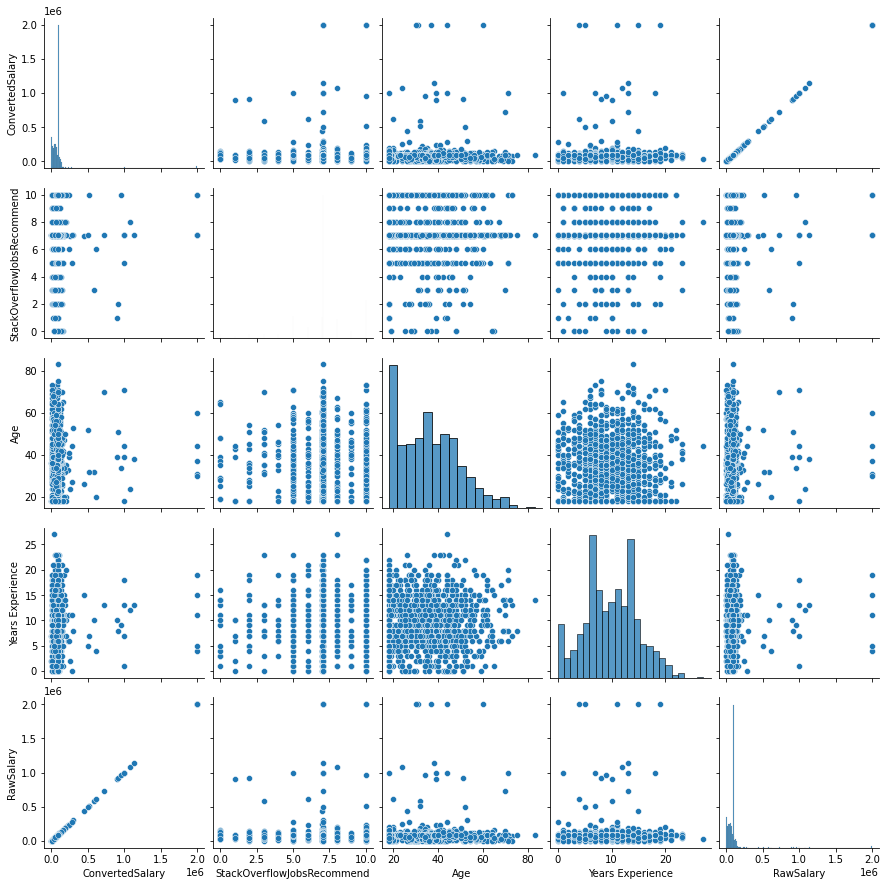

In [18]:
df_numeric = df[["ConvertedSalary", "StackOverflowJobsRecommend", "Age", "Years Experience", "RawSalary"]]
sns.pairplot(df_numeric)

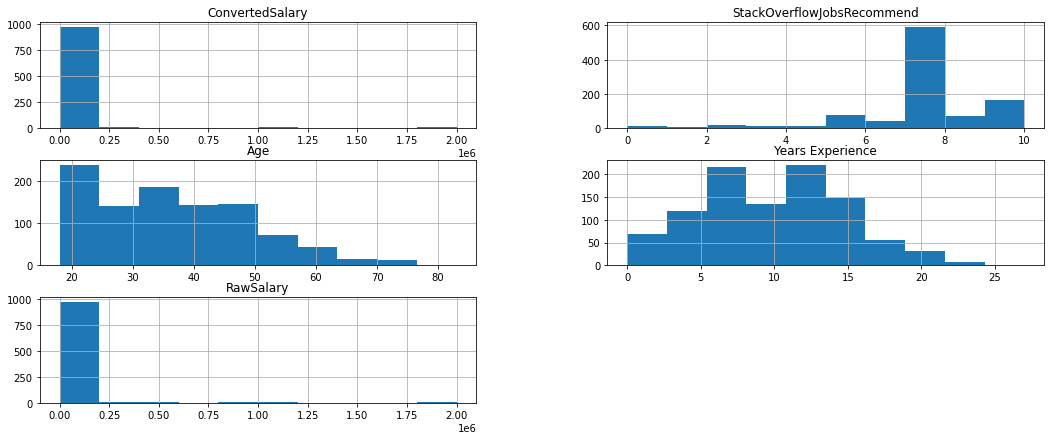

In [19]:
# Histogram
df_numeric.hist(figsize = (18, 7))
plt.title("Pairplot of Numeric Features", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

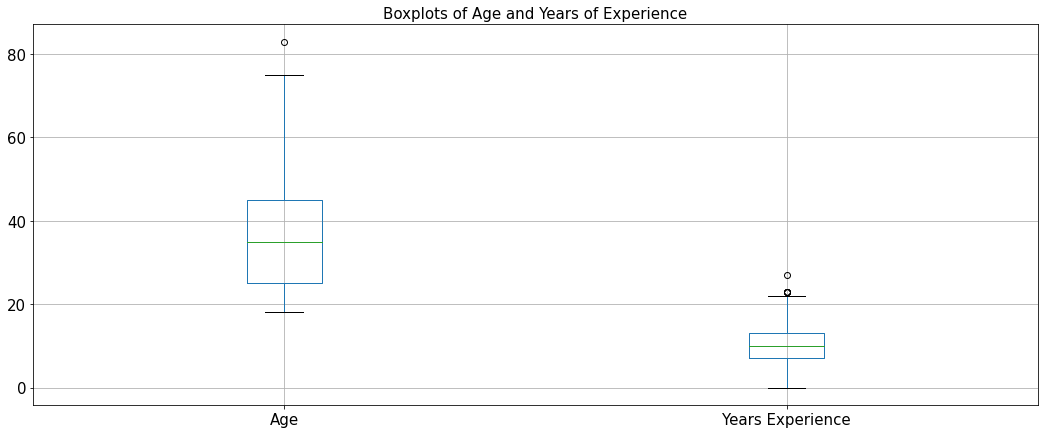

In [20]:
# Boxplots
df_numeric[["Age", "Years Experience"]].boxplot(figsize = (18, 7))
plt.title("Boxplots of Age and Years of Experience", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [21]:
df_numeric.describe()

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience,RawSalary
count,9.990000e+02,999.000000,999.000000,999.000000,9.990000e+02
mean,9.256511e+04,7.061602,36.003003,9.961962,9.256517e+04
std,1.705864e+05,1.829439,13.255127,4.878129,1.705864e+05
min,0.000000e+00,0.000000,18.000000,0.000000,0.000000e+00
25%,4.164150e+04,7.000000,25.000000,7.000000,4.164150e+04
50%,9.000000e+04,7.061602,35.000000,10.000000,9.000000e+04
75%,9.256500e+04,7.061602,45.000000,13.000000,9.256517e+04
max,2.000000e+06,10.000000,83.000000,27.000000,2.000000e+06


### Min-Max Scaling

In [22]:
scaler = MinMaxScaler()
df["Normalized Age"] = scaler.fit_transform(df[["Age"]])
df[:2]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,...,Russia,South Africa,Spain,Sweeden,UK,USA,Ukraine,Paid_Job,Boundary_Binned,Normalized Age
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),92565,Yes,7.061602,Git,21,13,Male,92565.169925,...,0,1,0,0,0,0,0,0,Medium,0.046154
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841,Yes,7.000000,Git;Subversion,38,9,Male,70841.000000,...,0,0,0,1,0,0,0,1,Medium,0.307692


### Standard Scaler

In [23]:
scalar = StandardScaler()
df["Standardardized Age"] = scalar.fit_transform(df[["Age"]])
df[:2]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,...,South Africa,Spain,Sweeden,UK,USA,Ukraine,Paid_Job,Boundary_Binned,Normalized Age,Standardardized Age
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),92565,Yes,7.061602,Git,21,13,Male,92565.169925,...,1,0,0,0,0,0,0,Medium,0.046154,-1.132431
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841,Yes,7.000000,Git;Subversion,38,9,Male,70841.000000,...,0,0,1,0,0,0,1,Medium,0.307692,0.150734


### Log Transformation

In [24]:
log = PowerTransformer()

df["Log_ConvertedSalary"] = log.fit_transform(df[["ConvertedSalary"]])
df[:2]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,...,Spain,Sweeden,UK,USA,Ukraine,Paid_Job,Boundary_Binned,Normalized Age,Standardardized Age,Log_ConvertedSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),92565,Yes,7.061602,Git,21,13,Male,92565.169925,...,0,0,0,0,0,0,Medium,0.046154,-1.132431,0.409123
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841,Yes,7.000000,Git;Subversion,38,9,Male,70841.000000,...,0,1,0,0,0,1,Medium,0.307692,0.150734,0.120777


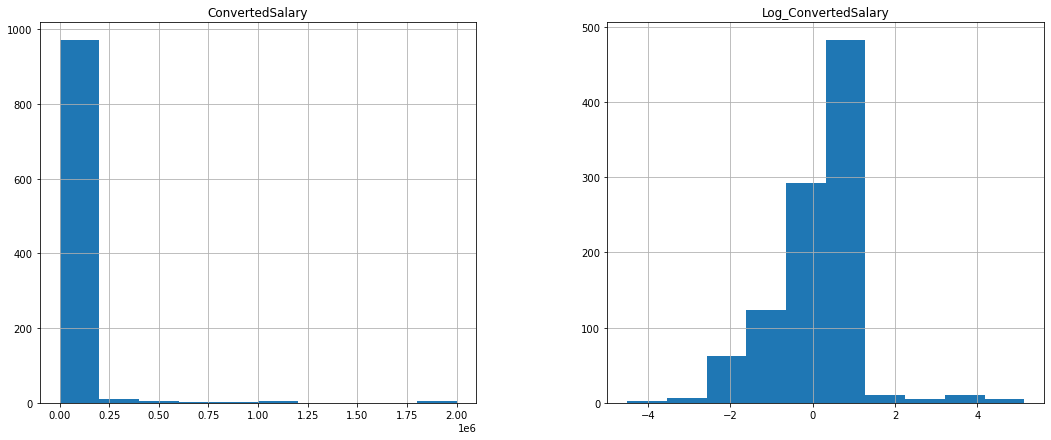

In [25]:
df[["ConvertedSalary", "Log_ConvertedSalary"]].hist(figsize = (18, 7))
plt.show()

### Quantiles

In [26]:
q_cutoff = df["ConvertedSalary"].quantile(0.95)

mask = df["ConvertedSalary"] < q_cutoff

trimmed_df = df[mask]

trimmed_df[:2]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,...,Spain,Sweeden,UK,USA,Ukraine,Paid_Job,Boundary_Binned,Normalized Age,Standardardized Age,Log_ConvertedSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),92565,Yes,7.061602,Git,21,13,Male,92565.169925,...,0,0,0,0,0,0,Medium,0.046154,-1.132431,0.409123
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841,Yes,7.000000,Git;Subversion,38,9,Male,70841.000000,...,0,1,0,0,0,1,Medium,0.307692,0.150734,0.120777


### Percentage based outlier removal

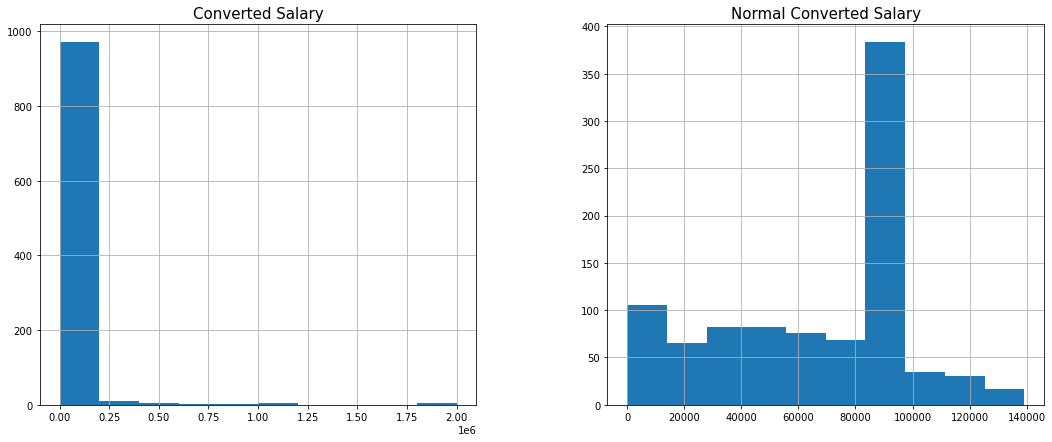

In [27]:
# The original histogram
fig, ax = plt.subplots(1, 2, figsize = (18, 7))
df[['ConvertedSalary']].hist(ax = ax[0])
ax[0].set_title("Converted Salary", size = 15)
trimmed_df["ConvertedSalary"].hist(ax = ax[1])
ax[1].set_title("Normal Converted Salary", size = 15)
plt.show()

### Statistical outlier removal

In [28]:
# Find the mean and standard dev
std = df["ConvertedSalary"].std()
mean = df["ConvertedSalary"].mean()

# Calculate the cutoff
cut_off = std * 3

lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = df[(df["ConvertedSalary"] < upper) & (df["ConvertedSalary"] > lower)]

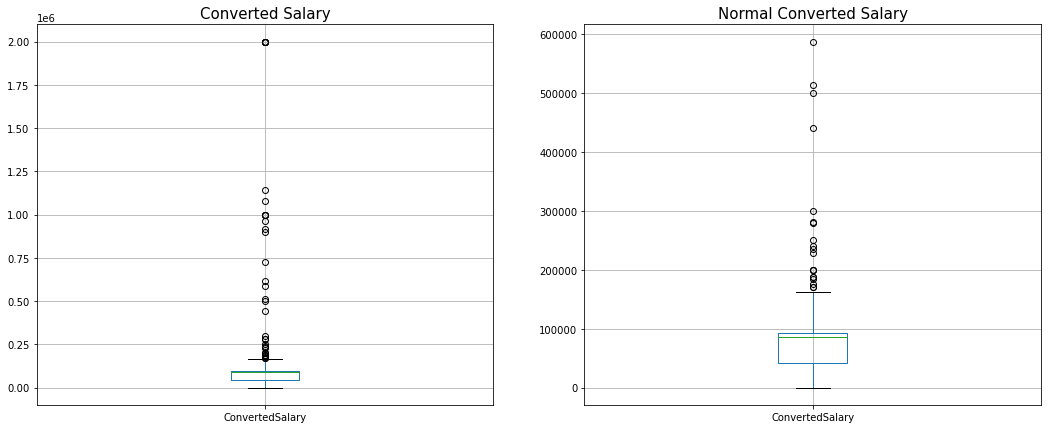

In [29]:
# The original histogram
fig, ax = plt.subplots(1, 2, figsize = (18, 7))
df[['ConvertedSalary']].boxplot(ax = ax[0])
ax[0].set_title("Converted Salary", size = 15)

trimmed_df[["ConvertedSalary"]].boxplot(ax = ax[1])
ax[1].set_title("Normal Converted Salary", size = 15)
plt.show()

### Train and testing transformations

In [30]:
SS_scaler = StandardScaler()

In [31]:
# Train
Train = df[["Age"]][:700]

Test = df[["Age"]][700:1000]

In [32]:
SS_scaler.fit(Train)

Test["Age_ss"] = SS_scaler.transform(Test)
Test[:10]

,Age,Age_ss
700,35,-0.069265
701,18,-1.343218
702,47,0.829997
703,57,1.579381
704,41,0.380366
705,37,0.080612
706,43,0.530243
707,29,-0.518895
708,46,0.755058
709,18,-1.343218


### Dealing with Text

In [33]:
df_t = pd.read_csv("inaugural_speeches.csv")
df_t[:2]

,Name,Inaugural Address,Date,text
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...


In [34]:
# Remove none text characters from text column
df_t["text"] = df_t["text"].str.replace("[^a-zA-Z]", " ")
df_t["text"][:5]

0    Fellow Citizens of the Senate and of the House...
1    Fellow Citizens   I AM again called upon by th...
2    WHEN it was first perceived  in early times  t...
3    Friends and Fellow Citizens   CALLED upon to u...
4    PROCEEDING  fellow citizens  to that qualifica...
Name: text, dtype: object

In [35]:
# Made all charactuers lowercase
df_t["text"] = df_t["text"].str.lower()
df_t["text"][0]

'fellow citizens of the senate and of the house of representatives   among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order  and received on the   th day of the present month  on the one hand  i was summoned by my country  whose voice i can never hear but with veneration and love  from a retreat which i had chosen with the fondest predilection  and  in my flattering hopes  with an immutable decision  as the asylum of my declining years u      a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination  and of frequent interruptions in my health to the gradual waste committed on it by time  on the other hand  the magnitude and difficulty of the trust to which the voice of my country called me  being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications  could n

In [36]:
# Length of Characters
df_t["Char Len"] = df_t["text"].str.len()
df_t[:5]

,Name,Inaugural Address,Date,text,Char Len
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",fellow citizens of the senate and of the house...,8616
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",fellow citizens i am again called upon by th...,787
2,John Adams,Inaugural Address,"Saturday, March 4, 1797",when it was first perceived in early times t...,13871
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",friends and fellow citizens called upon to u...,10144
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805",proceeding fellow citizens to that qualifica...,12902


In [37]:
# Length of Words
df_t["Words Len"] = df_t["text"].str.split().str.len()
df_t[:2]

,Name,Inaugural Address,Date,text,Char Len,Words Len
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",fellow citizens of the senate and of the house...,8616,1432
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",fellow citizens i am again called upon by th...,787,135


In [38]:
# Average Word Length
df_t["Avg Word Len"] = (df_t["Char Len"] / df_t["Words Len"]).round(2)
df_t[:2]

,Name,Inaugural Address,Date,text,Char Len,Words Len,Avg Word Len
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",fellow citizens of the senate and of the house...,8616,1432,6.02
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",fellow citizens i am again called upon by th...,787,135,5.83


### Initialize Vectorizer

In [39]:
cv = CountVectorizer(min_df = 0.1, max_df = 0.9)

In [40]:
cv_transform = cv.fit_transform(df_t["text"])
cv_transform[:2]

<2x1930 sparse matrix of type '<class 'numpy.int64'>'
	with 401 stored elements in Compressed Sparse Row format>

In [41]:
cv_df = pd.DataFrame(cv_transform.toarray(),
                     columns = cv.get_feature_names()).add_prefix("Count_")
cv_df[:2]

,Count_abandon,Count_abiding,Count_ability,Count_able,Count_about,Count_above,Count_abroad,Count_absolute,Count_abuse,Count_abuses,...,Count_year,Count_years,Count_yes,Count_yet,Count_yield,Count_you,Count_young,Count_your,Count_zeal,Count_zealously
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,5,0,9,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
speech_df = pd.concat([df_t, cv_df], axis = 1)
speech_df.shape

(58, 1937)

### Term frequency-inverse document frequency

In [43]:
tv = TfidfVectorizer(max_features = 100, stop_words = "english")
print(tv)

TfidfVectorizer(max_features=100, stop_words='english')


In [44]:
tv_transformed = tv.fit_transform(df_t["text"])

tv_df = pd.DataFrame(tv_transformed.toarray(),
                     columns = tv.get_feature_names()).add_prefix("TFIDF_")

tvdf_trans = pd.concat([df_t, tv_df], axis = 1)
tvdf_trans[:2]

,Name,Inaugural Address,Date,text,Char Len,Words Len,Avg Word Len,TFIDF_action,TFIDF_administration,TFIDF_america,...,TFIDF_things,TFIDF_time,TFIDF_today,TFIDF_union,TFIDF_united,TFIDF_war,TFIDF_way,TFIDF_work,TFIDF_world,TFIDF_years
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",fellow citizens of the senate and of the house...,8616,1432,6.02,0.0,0.133415,0.000000,...,0.0,0.045929,0.0,0.136012,0.203593,0.0,0.060755,0.0,0.045929,0.052694
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",fellow citizens i am again called upon by th...,787,135,5.83,0.0,0.261016,0.266097,...,0.0,0.000000,0.0,0.000000,0.199157,0.0,0.000000,0.0,0.000000,0.000000


In [45]:
# Isolate the row to be examined
sample_row = tv_df.iloc[0]
# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

TFIDF_government    0.367430
TFIDF_public        0.333237
TFIDF_present       0.315182
TFIDF_duty          0.238637
TFIDF_citizens      0.229644
Name: 0, dtype: float64


### Transforming unseen data

In [46]:
train_speech_df = df_t[:46]
test_speech_df = df_t[46:]

In [54]:
tv = TfidfVectorizer(max_features = 100, stop_words = "english")

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(train_speech_df["text"])

test_tv = tv.transform(test_speech_df["text"])

# Transform test data
test_tv_transformed = pd.DataFrame(test_tv.toarray(),
                                   columns = tv.get_feature_names()).add_prefix("_TFIDF")

test_tv_transformed.head()

,_TFIDFaction,_TFIDFadministration,_TFIDFamerica,_TFIDFamerican,_TFIDFbest,_TFIDFbusiness,_TFIDFcitizens,_TFIDFcommerce,_TFIDFcommon,_TFIDFconfidence,...,_TFIDFsubject,_TFIDFsupport,_TFIDFtime,_TFIDFunion,_TFIDFunited,_TFIDFwar,_TFIDFway,_TFIDFwork,_TFIDFworld,_TFIDFyears
0,0.000000,0.000000,0.536937,0.036504,0.036504,0.000000,0.015014,0.0,0.000000,0.017464,...,0.0,0.019526,0.092032,0.000000,0.000000,0.052392,0.065853,0.079912,0.276096,0.124968
1,0.000000,0.000000,0.123423,0.132160,0.132160,0.000000,0.000000,0.0,0.047127,0.042151,...,0.0,0.000000,0.074043,0.000000,0.078975,0.042151,0.052981,0.096437,0.222128,0.043089
2,0.036579,0.065076,0.255644,0.030416,0.060831,0.049217,0.075060,0.0,0.000000,0.000000,...,0.0,0.097614,0.204484,0.000000,0.054526,0.029102,0.036579,0.233039,0.230045,0.059499
3,0.000000,0.000000,0.212346,0.151584,0.086620,0.000000,0.106880,0.0,0.023166,0.020720,...,0.0,0.023166,0.181982,0.130216,0.038821,0.020720,0.078130,0.118512,0.291172,0.148265
4,0.066046,0.000000,0.269257,0.054917,0.027459,0.000000,0.045175,0.0,0.000000,0.000000,...,0.0,0.000000,0.161530,0.033023,0.073839,0.078819,0.099070,0.210385,0.230756,0.053715


### N-Grams

In [56]:
tv_bi_gram_vec = TfidfVectorizer(ngram_range = (2, 2))

tv_bi_gram = tv_bi_gram_vec.fit_transform(df_t["text"])

tv_bi_gram_vec.get_feature_names()[:5]

['abandon all',
 'abandon government',
 'abandon mastery',
 'abandon our',
 'abandon their']

In [58]:
# Create DataFrame with Count Features
tv_df = pd.DataFrame(tv_bi_gram.toarray(),
                     columns = tv_bi_gram_vec.get_feature_names()).add_prefix("Counts_")

tv_sums = tv_df.sum()
tv_sums.head()

Counts_abandon all           0.047565
Counts_abandon government    0.027832
Counts_abandon mastery       0.029715
Counts_abandon our           0.026602
Counts_abandon their         0.022495
dtype: float64

In [59]:
# Common Words
tv_sums.sort_values(ascending = False)[:5]

Counts_of the     8.223005
Counts_in the     3.998360
Counts_to the     3.503714
Counts_of our     3.117239
Counts_and the    2.364961
dtype: float64

### Using longer n-grams

In [61]:
# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features = 100,
                                 stop_words = "english",
                                 ngram_range = (3, 3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(df_t["text"])

# Print the trigram features
print(cv_trigram_vec.get_feature_names())

['ability preserve protect', 'agriculture commerce manufactures', 'america ideal freedom', 'amity mutual concession', 'anchor peace home', 'ask bow heads', 'best ability preserve', 'best interests country', 'bless god bless', 'bless united states', 'chief justice mr', 'children children children', 'citizens united states', 'civil religious liberty', 'civil service reform', 'commerce united states', 'confidence fellow citizens', 'congress extraordinary session', 'constitution does expressly', 'constitution united states', 'coordinate branches government', 'day task people', 'defend constitution united', 'distinction powers granted', 'distinguished guests fellow', 'does expressly say', 'equal exact justice', 'era good feeling', 'executive branch government', 'faithfully execute office', 'fellow citizens assembled', 'fellow citizens called', 'fellow citizens large', 'fellow citizens world', 'form perfect union', 'general welfare secure', 'god bless america', 'god bless god', 'good greates

### Finding the most common words

In [63]:
cv_tri_df = pd.DataFrame(cv_trigram.toarray(),
                         columns = cv_trigram_vec.get_feature_names()).add_prefix("Counts_")

# Print the top 5 words in the sorted output
cv_tri_df.sum().sort_values(ascending = False).head()

Counts_constitution united states    20
Counts_people united states          13
Counts_preserve protect defend       10
Counts_mr chief justice              10
Counts_president united states        8
dtype: int64